In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [ ]:
data_dir = '/content/drive/MyDrive/data/PD-L1 pixel distance'
#hist_dir = '/content/drive/MyDrive/data/hist/denormalized'
#hist_dir = '/content/drive/MyDrive/data/hist/denorm_manual_artifact_red'
hist_dir = './denorm_manual_artifact_red'

In [ ]:
results_dict = {'19-COMP-004': 1, '19-COMP-011': 1, '19-COMP-012': 1, '19-COMP-014': 1,
                '19-COMP-016': 1, '19-COMP-019': 1, '19-COMP-026': 1, '19-COMP-029': 1,
                '19-COMP-030': 1, '19-COMP-032': 1, '19-COMP-034': 1, '19-COMP-037': 1,
                '20-COMP-050': 1, '20-COMP-052': 1, '20-COMP-054': 1, '20-COMP-071': 1,
                '20-COMP-088': 1, '20-COMP-102': 1, '20-COMP-103': 1, '20-COMP-113': 1,
                '19-COMP-017': 0, '19-COMP-020': 0, '19-COMP-021': 0, '19-COMP-036': 0,
                '19-COMP-039': 0, '19-COMP-044': 0, '19-COMP-047': 0, '20-COMP-055': 0,
                '20-COMP-056': 0, '20-COMP-059': 0, '20-COMP-063': 0, '20-COMP-065': 0,
                '20-COMP-066': 0, '20-COMP-068': 0, '20-COMP-070': 0, '20-COMP-073': 0,
                '20-COMP-075': 0, '20-COMP-076': 0, '20-COMP-077': 0, '20-COMP-078': 0}

In [ ]:
tr_set = ['19-COMP-004', '19-COMP-011', '19-COMP-012', '19-COMP-014', '19-COMP-016',
          '19-COMP-019', '19-COMP-029', '19-COMP-030', '19-COMP-032', '19-COMP-034',
          '20-COMP-050', '20-COMP-052', '20-COMP-054', '20-COMP-071', '20-COMP-088',
          '20-COMP-103', '20-COMP-113', '19-COMP-017', '19-COMP-020', '19-COMP-021',
          '19-COMP-044', '19-COMP-047', '20-COMP-055', '20-COMP-056', '20-COMP-059',
          '20-COMP-063', '20-COMP-066', '20-COMP-068', '20-COMP-070', '20-COMP-073',
          '20-COMP-075', '20-COMP-076', '20-COMP-078']

ts_set = ['20-COMP-077', '20-COMP-065', '19-COMP-039', '20-COMP-102', '19-COMP-037', '19-COMP-026']

In [ ]:
def add_padding(hist):
  return np.pad(hist, (0, 100-len(hist)), 'constant')

In [ ]:
def get_log_hist(hist):
    log_hist = np.log10(hist) + 8
    #min_bin = np.min(log_hist)
    #log_hist = log_hist - min_bin
    return log_hist

Import slides and add log scale and padding to 100 bins

In [ ]:
def import_histograms(tr_set, ts_set):
  num_bins = 100

  # Training set
  histograms_tr = []
  for i, slide_name in enumerate(tr_set):
      histograms_tr.append(add_padding(get_log_hist(np.load(hist_dir+'/'+slide_name+'_bins_denorm_100r0.95.npy'))))
      print(slide_name)

  targets_tr = np.zeros(np.shape(tr_set), dtype='int')
  for i, slide_name in enumerate(tr_set):
    targets_tr[i] = results_dict[slide_name]

  # Test set
  histograms_ts = []
  for i, slide_name in enumerate(ts_set):
    histograms_ts.append(add_padding(get_log_hist(np.load(hist_dir+'/'+slide_name+'_bins_denorm_100r0.95.npy'))))
    print(slide_name)

  targets_ts = np.zeros(np.shape(ts_set), dtype='int')
  for i, slide_name in enumerate(ts_set):
    targets_ts[i] = results_dict[slide_name]
  
  return histograms_tr, histograms_ts, targets_tr, targets_ts

In [ ]:
histograms_tr, histograms_ts, targets_tr, targets_ts = import_histograms(tr_set, ts_set)

19-COMP-004
19-COMP-011
19-COMP-012
19-COMP-014
19-COMP-016
19-COMP-019
19-COMP-029
19-COMP-030
19-COMP-032
19-COMP-034
20-COMP-050
20-COMP-052
20-COMP-054
20-COMP-071
20-COMP-088
20-COMP-103
20-COMP-113
19-COMP-017
19-COMP-020
19-COMP-021
19-COMP-044
19-COMP-047
20-COMP-055
20-COMP-056
20-COMP-059
20-COMP-063
20-COMP-066
20-COMP-068
20-COMP-070
20-COMP-073
20-COMP-075
20-COMP-076
20-COMP-078
20-COMP-077
20-COMP-065
19-COMP-039
20-COMP-102
19-COMP-037
19-COMP-026


Show slides log + padded histograms

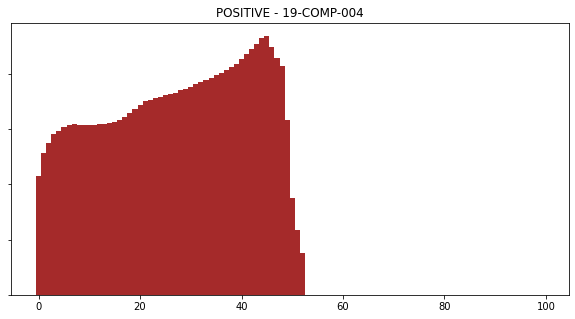

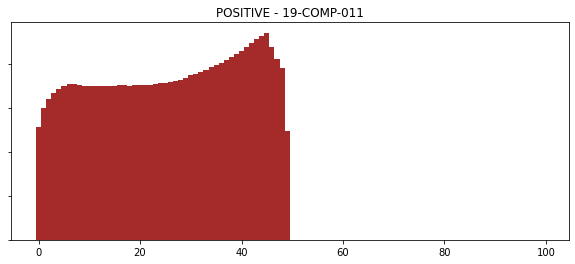

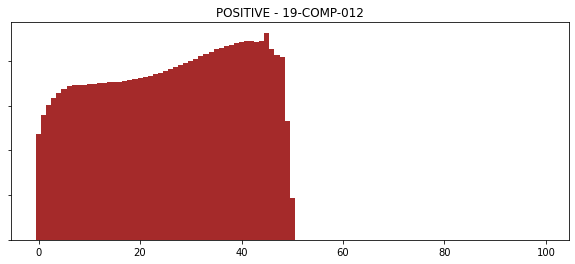

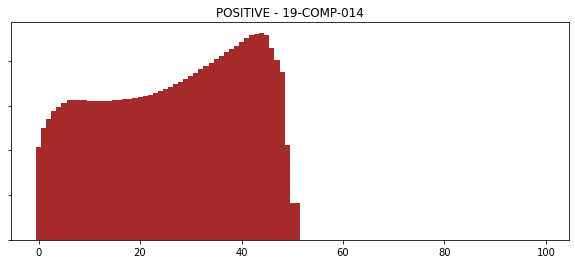

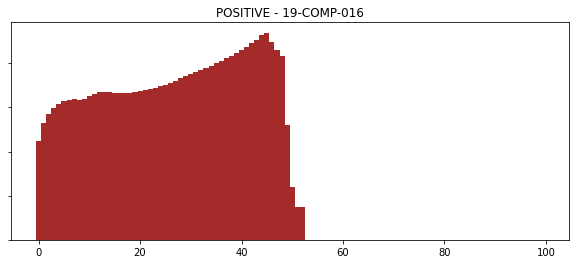

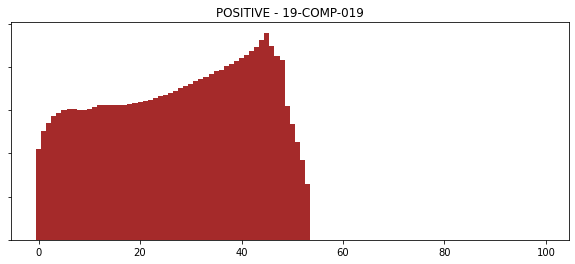

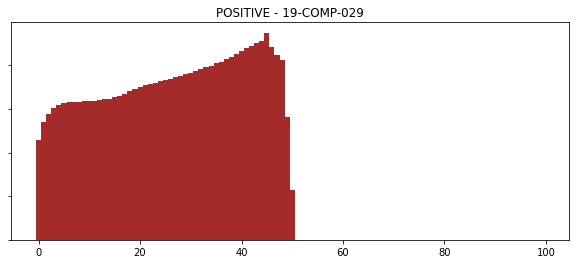

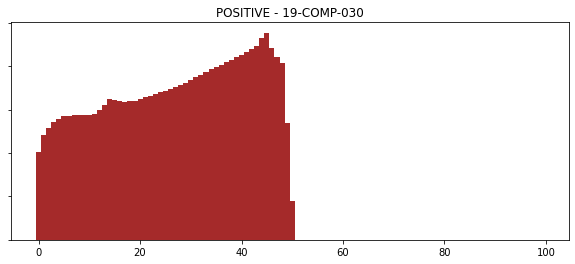

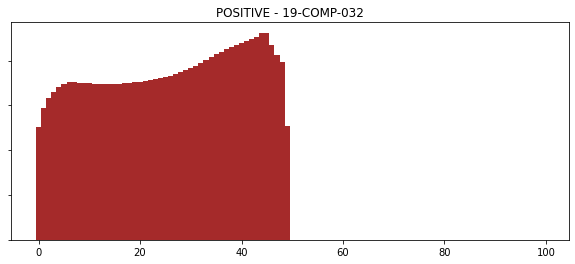

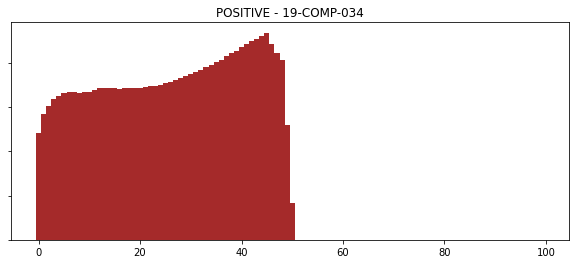

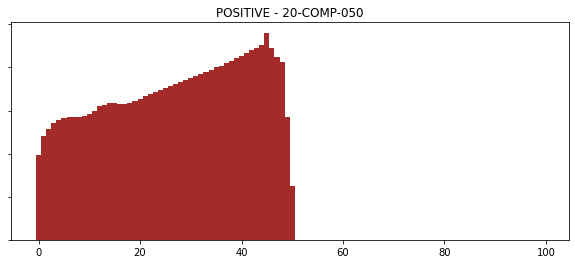

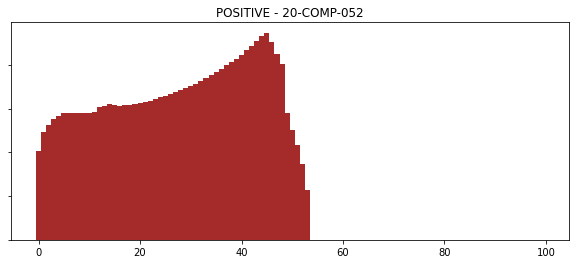

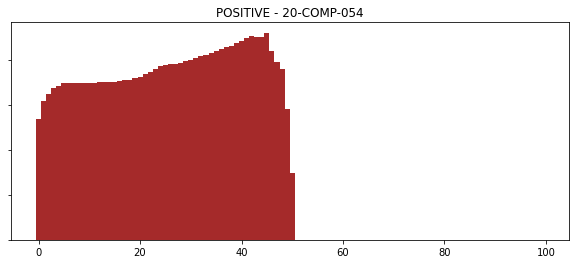

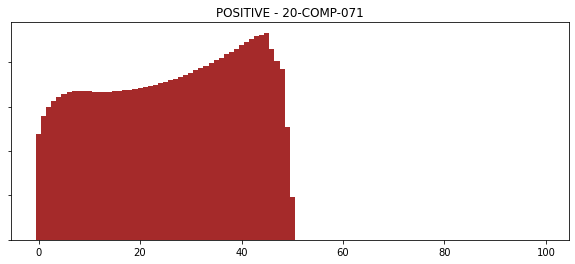

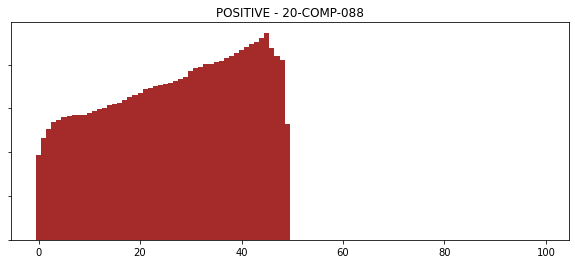

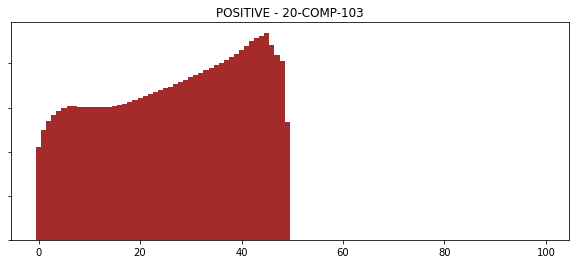

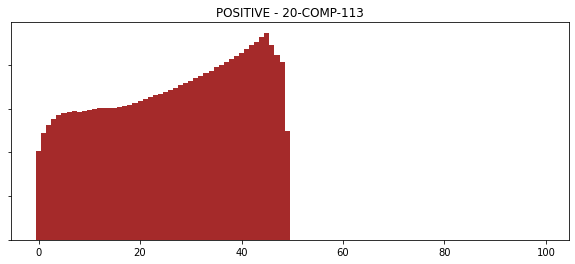

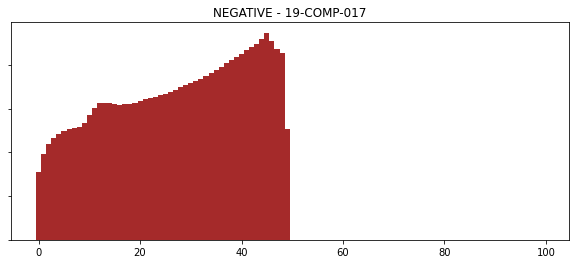

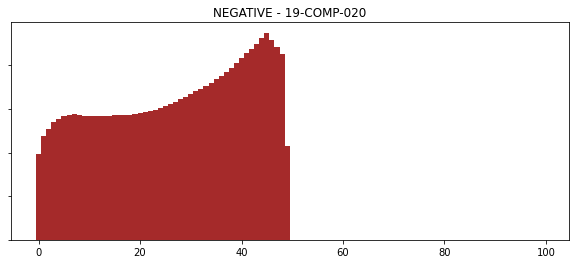

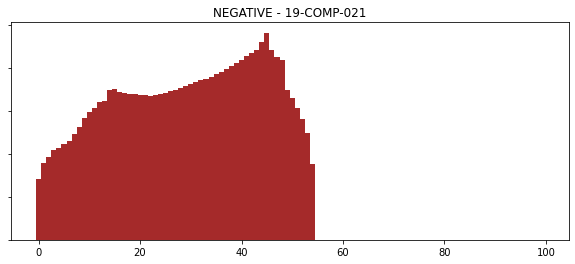

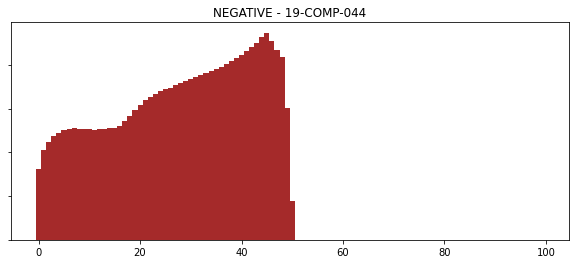

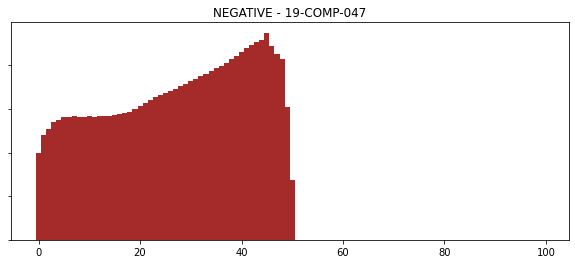

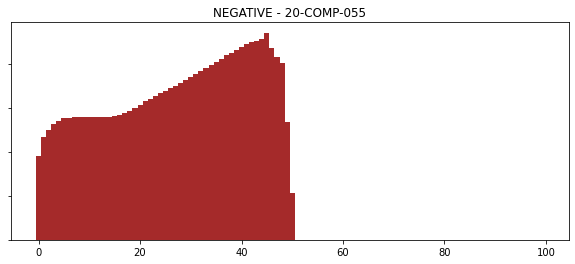

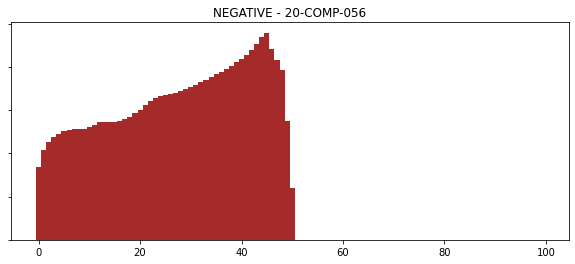

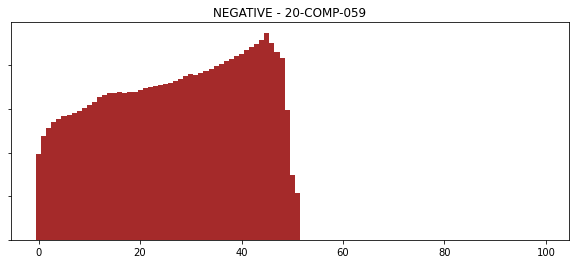

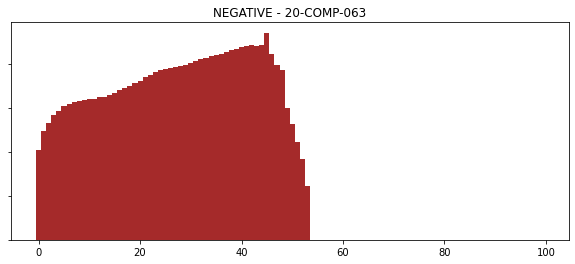

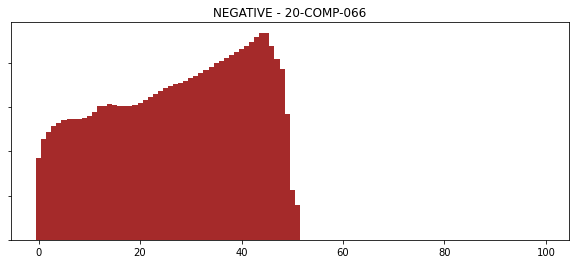

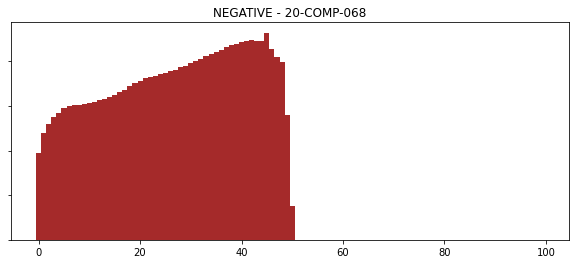

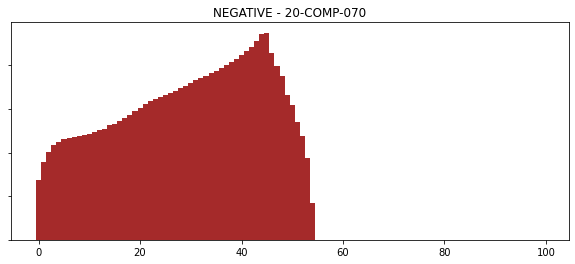

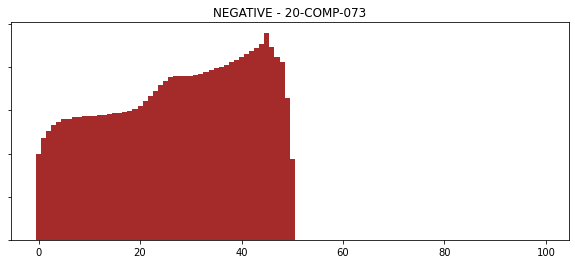

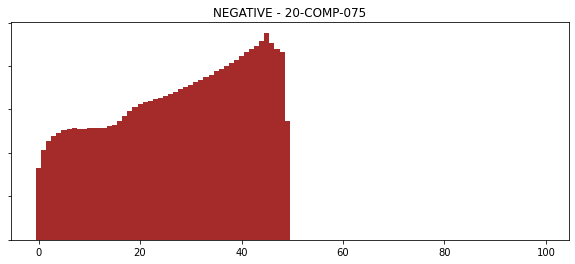

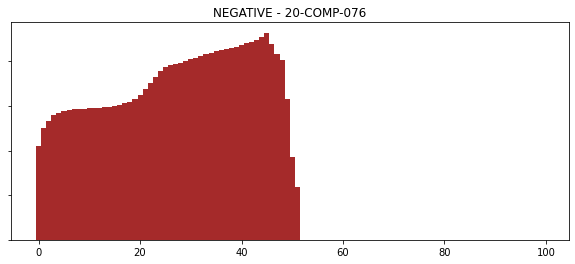

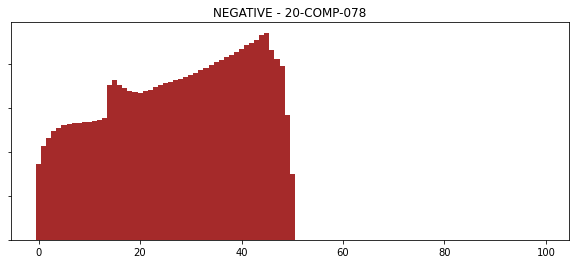

In [ ]:
for i, slide_name in enumerate(tr_set):    
  plt.bar(x=range(len(histograms_tr[i])), height=histograms_tr[i], color='brown', width=1.0)
  if results_dict[slide_name]:
    title='POSITIVE - ' + slide_name
  else:
    title='NEGATIVE - ' + slide_name
  
  plt.rcParams["figure.figsize"] = (10, 4)  
  ax = plt.gca()
  # xticks setting to be empty
  ax.axes.yaxis.set_ticklabels([])  
  plt.title(title)
  plt.show()

In [ ]:
def find_classification_threshold(perc_arr, targets):
    min_errors_threshold = 0
    min_errors = len(targets)
    
    #set threshold at every score in result percentages array
    for perc in perc_arr:
        classification_threshold = round(perc, 5)
        errors = 0

        for i, target in enumerate(targets):
            score = perc_arr[i]
            if score < classification_threshold:
                if target != 0:
                   errors+=1
            else:
                if target != 1:
                   errors+=1
        
        if errors <= min_errors:
            min_errors = errors
            min_errors_threshold = classification_threshold
        
    return (min_errors_threshold, min_errors)

Find best bin threshold up to which to sum bins and best positivity percentage threshold that classify correctly most slides

In [ ]:
def find_bin_threshold(histograms, targets):
  best_bin_thresh = []
  best_perc_thresh = []
  best_preds = []
  min_errors = len(tr_set) + 1

  # Try different bin thresholds up to which bins value are summed
  for bin_thresh in range(5, 30):
      slides_pos_perc = np.zeros(np.shape(targets))

      # Sum all bins up to bin_thresh
      for i, target in enumerate(targets):
          hist = histograms[i]
          pdl1_pixels = np.sum(hist[:bin_thresh])
          tot_pixels = np.sum(hist)
          # Calculate slide positivity percentage over tot pixels
          slides_pos_perc[i] = pdl1_pixels/tot_pixels
          
      # Find best slide positivity percentage threshold to classify most slides
      perc_threshold, num_errors = find_classification_threshold(slides_pos_perc, targets)

      # Classify slides based on the pos. perc. threshold
      slides_preds = slides_pos_perc > perc_threshold
          
      print('bin_thresh:', bin_thresh, 'perc_threshold:', perc_threshold, ', num_errors:', num_errors)
      if num_errors == min_errors:
          best_bin_thresh.append(bin_thresh)
          best_preds.append(slides_preds)
          best_perc_thresh.append(perc_threshold)
      if num_errors < min_errors:
          best_bin_thresh = [bin_thresh]
          best_preds = [slides_preds]
          best_perc_thresh = [perc_threshold]
          min_errors = num_errors

  best_preds = np.array(best_preds).astype(int)
  return best_bin_thresh, best_perc_thresh, min_errors, best_preds

# Internal cross validation

In [ ]:
total_internal_hist = np.concatenate((histograms_tr, histograms_ts), axis=0)
total_internal_targets = np.concatenate((targets_tr, targets_ts), axis=0)

In [ ]:
n_folds = 6
skf = StratifiedKFold(n_splits=n_folds, shuffle = True, random_state=1)

acc_arr = np.zeros(n_folds)
f1_arr = np.zeros(n_folds)
f1_weight_arr = np.zeros(n_folds)
bin_thresh_arr = []
perc_thresh_arr = []


for s, (train_index, test_index) in enumerate(skf.split(total_internal_hist, total_internal_targets)):
  histograms_tr, histograms_ts = total_internal_hist[train_index], total_internal_hist[test_index]
  targets_tr, targets_ts = total_internal_targets[train_index], total_internal_targets[test_index]
  # Training
  best_bin_thresh, best_perc_thresh, min_errors, best_preds = find_bin_threshold(histograms_tr, targets_tr)

  # Test
  test_bin_thresh = best_bin_thresh[0]
  test_perc_thresh = best_perc_thresh[0] 
  
  bin_thresh_arr.append(test_bin_thresh)
  perc_thresh_arr.append(test_perc_thresh)

  slides_pos_perc_ts = np.zeros(np.shape(targets_ts))

  for i, target in enumerate(targets_ts):
    slide_bins = histograms_ts[i]
    pdl1_pixels = np.sum(slide_bins[:test_bin_thresh])
    tot_pixels = np.sum(slide_bins)
    # Calculate slide positivity percentage over tot pixels
    slides_pos_perc_ts[i] = pdl1_pixels/tot_pixels

  preds = (slides_pos_perc_ts > test_perc_thresh).astype('int')
  
  acc = accuracy_score(targets_ts, preds)
  f1 = f1_score(targets_ts, preds)
  weight_f1 = f1_score(targets_ts, preds, average='weighted')
  acc_arr[s] = acc
  f1_arr[s] = f1
  f1_weight_arr[s] = weight_f1

bin_thresh: 5 perc_threshold: 0.07189 , num_errors: 6
bin_thresh: 6 perc_threshold: 0.08489 , num_errors: 6
bin_thresh: 7 perc_threshold: 0.10246 , num_errors: 5
bin_thresh: 8 perc_threshold: 0.11849 , num_errors: 5
bin_thresh: 9 perc_threshold: 0.13455 , num_errors: 5
bin_thresh: 10 perc_threshold: 0.1538 , num_errors: 6
bin_thresh: 11 perc_threshold: 0.17118 , num_errors: 6
bin_thresh: 12 perc_threshold: 0.188 , num_errors: 6
bin_thresh: 13 perc_threshold: 0.20368 , num_errors: 5
bin_thresh: 14 perc_threshold: 0.22221 , num_errors: 6
bin_thresh: 15 perc_threshold: 0.2393 , num_errors: 5
bin_thresh: 16 perc_threshold: 0.25501 , num_errors: 6
bin_thresh: 17 perc_threshold: 0.27346 , num_errors: 5
bin_thresh: 18 perc_threshold: 0.28872 , num_errors: 5
bin_thresh: 19 perc_threshold: 0.30496 , num_errors: 6
bin_thresh: 20 perc_threshold: 0.32522 , num_errors: 5
bin_thresh: 21 perc_threshold: 0.34269 , num_errors: 5
bin_thresh: 22 perc_threshold: 0.36033 , num_errors: 6
bin_thresh: 23 perc

In [ ]:
print('acc_arr:', acc_arr)
print('f1_arr:', f1_arr)
print('f1_weight_arr:', f1_weight_arr)


avg_acc = np.average(acc_arr)
print('avg_acc:', avg_acc)

avg_f1 = np.average(f1_arr)
print('avg_f1:', avg_f1)

avg_f1_weight = np.average(f1_weight_arr)
print('avg_f1_weight:', avg_f1_weight)

acc_arr: [0.85714286 0.85714286 0.71428571 0.66666667 1.         0.5       ]
f1_arr: [0.88888889 0.88888889 0.66666667 0.66666667 1.         0.66666667]
f1_weight_arr: [0.85079365 0.85079365 0.71428571 0.66666667 1.         0.33333333]
avg_acc: 0.7658730158730158
avg_f1: 0.7962962962962963
avg_f1_weight: 0.7359788359788358


# External test set

In [ ]:
#hist_dir_ext = '/content/drive/MyDrive/data/hist/denormalized_ext'
hist_dir_ext = '/content/drive/MyDrive/data/hist/denormalized_manual_ext'

In [ ]:
results_dict_ext = {'M-180-20-A1 SP142': 0, 'M-3784-20-A1 SP142': 1, 'M-3905-20 SP142 (1)': 1, 'M-534-20-1 SP142': 1, 'M-834-21 SP142': 1,
 'M-1163-20 SP142': 0, 'M-1242-20 SP142': 0, 'M-180-20 (3) B1': 0, 'M-182-20-A1 SP142': 0, 'M-313-20 SP142': 0, 'M-3454-20-A1 SP142': 0,
 'M-3587-20 SP142': 0, 'M-360-20 SP142': 0, 'M-3760-20-A1 SP142': 0, 'M-3914-20 SP142 (2)': 0, 'M-4075-20 SP142 (2)': 0,
 'M-4092-20 SP142 (2)': 0, 'M-5248-20 SP142 (1)': 0, 'M-527-20 MA1-SP142': 0, 'M-527-20 MA2-SP142': 0, 'M-5428-20 SP142': 0,
 'M-5696-20 (3)': 0, 'M-5697-20 SP142': 0, 'M-6014-20 A1-SP142': 0, 'M-6052-20 A1-SP142': 0, 'M-67-21-1-SP142 (4)': 0}

In [ ]:
ext_set = ['M-180-20-A1 SP142', 'M-3784-20-A1 SP142', 'M-3905-20 SP142 (1)', 'M-534-20-1 SP142', 'M-834-21 SP142',
              'M-1163-20 SP142', 'M-1242-20 SP142', 'M-180-20 (3) B1', 'M-182-20-A1 SP142', 'M-313-20 SP142', 'M-3454-20-A1 SP142',
              'M-3587-20 SP142', 'M-360-20 SP142', 'M-3760-20-A1 SP142', 'M-3914-20 SP142 (2)', 'M-4075-20 SP142 (2)',
              'M-4092-20 SP142 (2)', 'M-5248-20 SP142 (1)', 'M-527-20 MA1-SP142', 'M-527-20 MA2-SP142', 'M-5428-20 SP142',
              'M-5696-20 (3)', 'M-5697-20 SP142', 'M-6052-20 A1-SP142', 'M-67-21-1-SP142 (4)']

In [ ]:
num_bins = 100

# External test set
padded_log_histograms_ext = []
log_histograms_ext = []
histograms_ext = []

for i, slide_name in enumerate(ext_set):
  histograms_ext.append((np.load(hist_dir_ext+'/'+slide_name+'_bins_denorm_100r0.95.npy')))
  padded_log_histograms_ext.append(add_padding(get_log_hist(np.load(hist_dir_ext+'/'+slide_name+'_bins_denorm_100r0.95.npy'))))
  print(slide_name)

targets_ext = np.zeros(np.shape(ext_set), dtype='int')
for i, slide_name in enumerate(ext_set):
  targets_ext[i] = results_dict_ext[slide_name]

M-180-20-A1 SP142
M-3784-20-A1 SP142
M-3905-20 SP142 (1)
M-534-20-1 SP142
M-834-21 SP142
M-1163-20 SP142
M-1242-20 SP142
M-180-20 (3) B1
M-182-20-A1 SP142
M-313-20 SP142
M-3454-20-A1 SP142
M-3587-20 SP142
M-360-20 SP142
M-3760-20-A1 SP142
M-3914-20 SP142 (2)
M-4075-20 SP142 (2)
M-4092-20 SP142 (2)
M-5248-20 SP142 (1)
M-527-20 MA1-SP142
M-527-20 MA2-SP142
M-5428-20 SP142
M-5696-20 (3)
M-5697-20 SP142
M-6052-20 A1-SP142
M-67-21-1-SP142 (4)


In [ ]:
X = padded_log_histograms_ext
y = targets_ext

pred_table = np.zeros((n_folds, len(y)))

# Iterate over all models (couples <bin_thresh,perc_thresh>)
for j, b_thresh in enumerate(bin_thresh_arr):
  p_thresh = perc_thresh_arr[j]

  slides_pos_perc = np.zeros(len(y))
  for i, x in enumerate(X):
    pdl1_pixels = np.sum(x[:b_thresh])
    tot_pixels = np.sum(x)
    # Calculate slide positivity percentage over tot pixels
    slides_pos_perc[i] = pdl1_pixels/tot_pixels

  y_pred = (slides_pos_perc > p_thresh).astype('int')
  pred_table[j, :] = y_pred

final_preds = np.zeros(len(y))

for j in range(len(y)):
  avg = (np.average(pred_table[:, j]))
  if avg == 0.5:
    avg = np.average(pred_table[:, j], weights=acc_arr)
  final_preds[j] = (avg > 0.5).astype('int')

acc = accuracy_score(y, final_preds)
f1 = f1_score(y, final_preds)
weight_f1 = f1_score(y, final_preds, average='weighted')
tn, fp, fn, tp = confusion_matrix(y, final_preds).ravel()

In [ ]:
print('acc ext:', acc)
print('f1 ext:', f1)
print('weight_f1 ext:', weight_f1)

print('tn:', tn, 'fp:', fp, 'fn:', fn, 'tp:', tp)

acc ext: 0.76
f1 ext: 0.5
weight_f1 ext: 0.7873684210526315
tn: 16 fp: 5 fn: 1 tp: 3


# Combined internal + ext dataset

In [ ]:
histograms_tr, histograms_ts, targets_tr, targets_ts = import_histograms(tr_set, ts_set)


19-COMP-004
19-COMP-011
19-COMP-012
19-COMP-014
19-COMP-016
19-COMP-019
19-COMP-029
19-COMP-030
19-COMP-032
19-COMP-034
20-COMP-050
20-COMP-052
20-COMP-054
20-COMP-071
20-COMP-088
20-COMP-103
20-COMP-113
19-COMP-017
19-COMP-020
19-COMP-021
19-COMP-044
19-COMP-047
20-COMP-055
20-COMP-056
20-COMP-059
20-COMP-063
20-COMP-066
20-COMP-068
20-COMP-070
20-COMP-073
20-COMP-075
20-COMP-076
20-COMP-078
20-COMP-077
20-COMP-065
19-COMP-039
20-COMP-102
19-COMP-037
19-COMP-026


In [ ]:
total_ext_norm_hist = np.concatenate((histograms_tr, histograms_ts, padded_log_histograms_ext), axis=0)
total_ext_norm_targets = np.concatenate((targets_tr, targets_ts, targets_ext), axis=0)

In [ ]:
n_folds = 6
skf = StratifiedKFold(n_splits=n_folds, shuffle = True, random_state=1)

acc_arr = np.zeros(n_folds)
f1_arr = np.zeros(n_folds)
weight_f1_arr = np.zeros(n_folds)

bin_thresh_arr = []
perc_thresh_arr = []


for s, (train_index, test_index) in enumerate(skf.split(total_ext_norm_hist, total_ext_norm_targets)):
  histograms_tr, histograms_ts = total_ext_norm_hist[train_index], total_ext_norm_hist[test_index]
  targets_tr, targets_ts = total_ext_norm_targets[train_index], total_ext_norm_targets[test_index]

  # Training
  best_bin_thresh, best_perc_thresh, min_errors, best_preds = find_bin_threshold(histograms_tr, targets_tr)

  # Test
  test_bin_thresh = best_bin_thresh[0]
  test_perc_thresh = best_perc_thresh[0] 
  
  bin_thresh_arr.append(test_bin_thresh)
  perc_thresh_arr.append(test_perc_thresh)

  slides_pos_perc_ts = np.zeros(np.shape(targets_ts))

  for i, target in enumerate(targets_ts):
    slide_bins = histograms_ts[i]
    pdl1_pixels = np.sum(slide_bins[:test_bin_thresh])
    tot_pixels = np.sum(slide_bins)
    # Calculate slide positivity percentage over tot pixels
    slides_pos_perc_ts[i] = pdl1_pixels/tot_pixels

  preds = (slides_pos_perc_ts > test_perc_thresh).astype('int')
  acc = accuracy_score(targets_ts, preds)
  f1 = f1_score(targets_ts, preds)
  weight_f1 = f1_score(targets_ts, preds, average='weighted')
  acc_arr[s] = acc
  f1_arr[s] = f1
  weight_f1_arr[s] = weight_f1


bin_thresh: 5 perc_threshold: 0.0694 , num_errors: 13
bin_thresh: 6 perc_threshold: 0.08489 , num_errors: 13
bin_thresh: 7 perc_threshold: 0.10351 , num_errors: 12
bin_thresh: 8 perc_threshold: 0.11849 , num_errors: 12
bin_thresh: 9 perc_threshold: 0.13573 , num_errors: 12
bin_thresh: 10 perc_threshold: 0.15224 , num_errors: 11
bin_thresh: 11 perc_threshold: 0.16825 , num_errors: 11
bin_thresh: 12 perc_threshold: 0.18478 , num_errors: 11
bin_thresh: 13 perc_threshold: 0.20368 , num_errors: 11
bin_thresh: 14 perc_threshold: 0.21762 , num_errors: 11
bin_thresh: 15 perc_threshold: 0.2393 , num_errors: 11
bin_thresh: 16 perc_threshold: 0.25288 , num_errors: 11
bin_thresh: 17 perc_threshold: 0.27058 , num_errors: 10
bin_thresh: 18 perc_threshold: 0.28786 , num_errors: 10
bin_thresh: 19 perc_threshold: 0.30496 , num_errors: 11
bin_thresh: 20 perc_threshold: 0.32522 , num_errors: 11
bin_thresh: 21 perc_threshold: 0.34269 , num_errors: 11
bin_thresh: 22 perc_threshold: 0.36411 , num_errors: 13

In [ ]:
print('acc_arr:', acc_arr)
print('f1_arr:', f1_arr)
print('weight_f1_arr:', weight_f1_arr)


avg_acc = np.average(acc_arr)
print('avg_acc:', avg_acc)

avg_f1 = np.average(f1_arr)
print('avg_f1:', avg_f1)

avg_weight_f1 = np.average(weight_f1_arr)
print('avg_weight_f1:', avg_weight_f1)

acc_arr: [0.90909091 0.54545455 0.54545455 0.72727273 0.7        0.9       ]
f1_arr: [0.88888889 0.         0.54545455 0.72727273 0.66666667 0.88888889]
weight_f1_arr: [0.91064491 0.44919786 0.54545455 0.72727273 0.7030303  0.9010101 ]
avg_acc: 0.7212121212121213
avg_f1: 0.6195286195286195
avg_weight_f1: 0.7061017413958591
